In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [243]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [244]:
#EDA
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [245]:
df.shape

(918, 12)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [247]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [248]:
df.duplicated().sum()

0

As now here we have to predict the heart disease so we will check the distibution here how it is

In [249]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

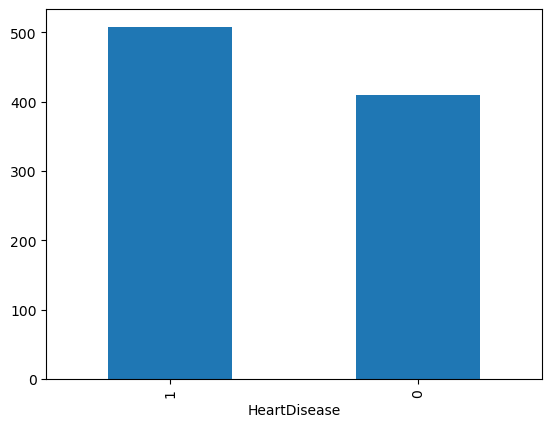

In [250]:
df['HeartDisease'].value_counts().plot(kind="bar")

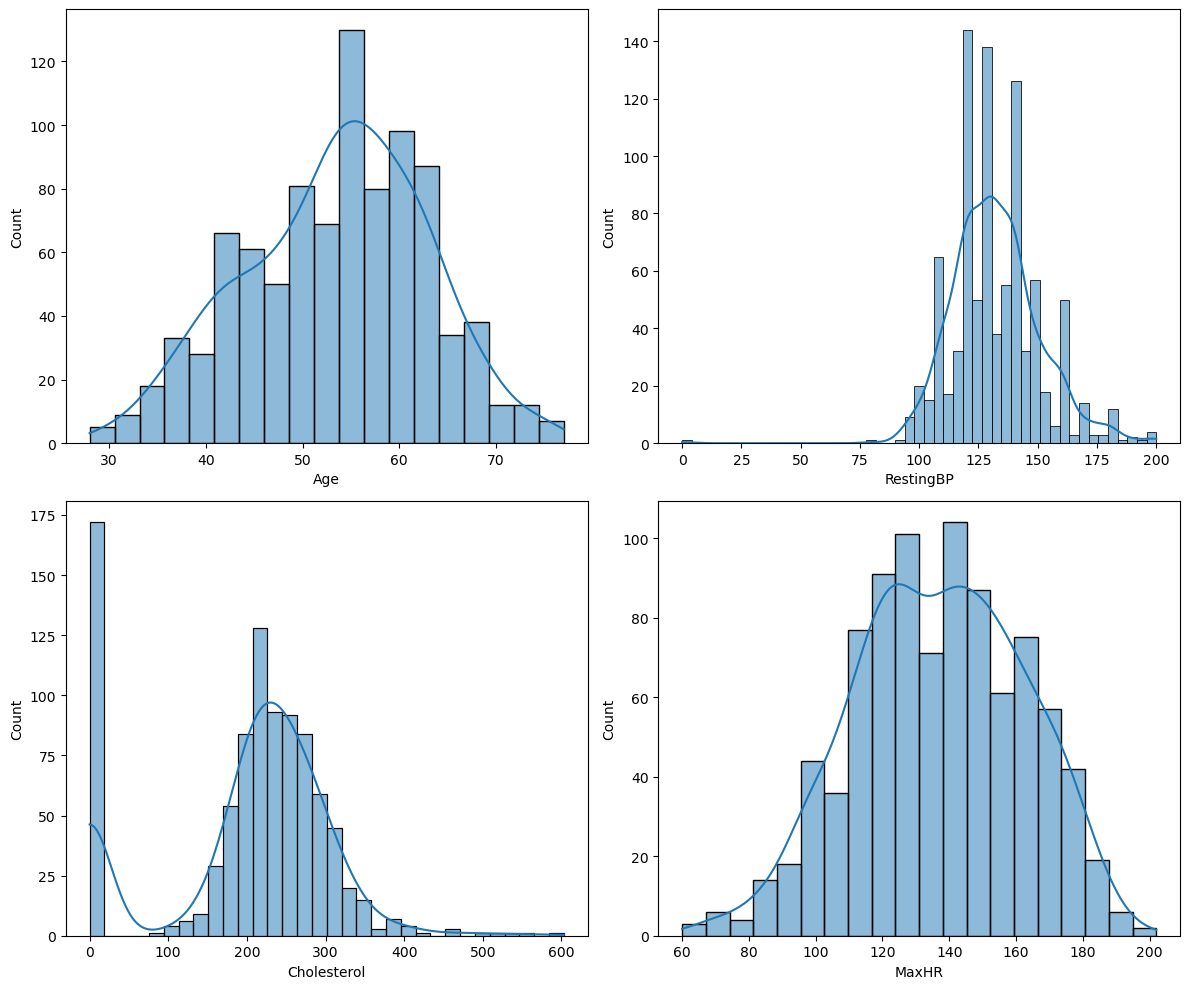

In [251]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)


plot_cols = ['Age','RestingBP',	'Cholesterol',	'MaxHR']

plt.figure(figsize=(12, 10))

for i, col in enumerate(plot_cols, start=1):
     plotting(col, i)

plt.tight_layout()

As if we see above in the plots there are some issues in data<br>
As cholresterol there is count for 0 value but if you see in real life there is no 0 cholesterol value possible
And Same fpr the RestingBP <br>
So we need to clean that also

In [252]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [253]:
ch_mean = df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()


ch_std = df.loc[df['Cholesterol']!=0,'Cholesterol'].std()
ch_mean

244.6353887399464

As we can see the <br>
Cholesterol<br>
0      172<br>
so now we will fill the 0 value by the mean 

In [254]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)



In [255]:
df['RestingBP'].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64

In [256]:
zero_rbp = df.loc[df['RestingBP']==0,'RestingBP']
zero_rbp

449    0
Name: RestingBP, dtype: int64

In [257]:
rbp_mean = df.loc[df['RestingBP']!=0,'RestingBP'].mean()
rbp_mean = rbp_mean.round(2)
rbp_mean


132.54

In [258]:
df['RestingBP']=df['RestingBP'].replace(0,rbp_mean)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


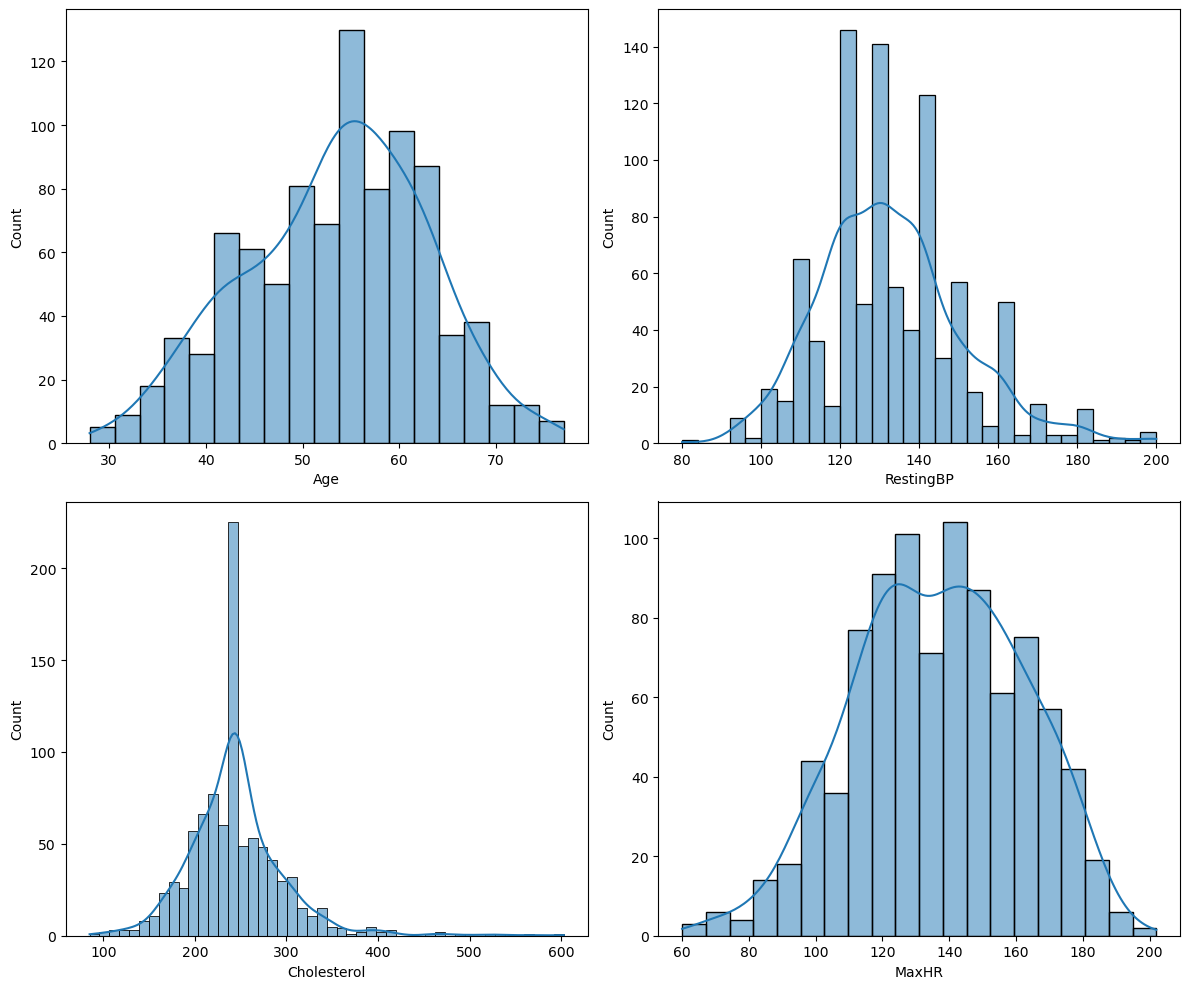

In [259]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)


plot_cols = ['Age','RestingBP',	'Cholesterol',	'MaxHR']

plt.figure(figsize=(12, 10))

for i, col in enumerate(plot_cols, start=1):
     plotting(col, i)

plt.tight_layout()

Now lets go for the categorical Columns
Sex, ChestPainType,	RestingECG,	ExerciseAngina,		ST_Slope

<Axes: xlabel='Sex', ylabel='count'>

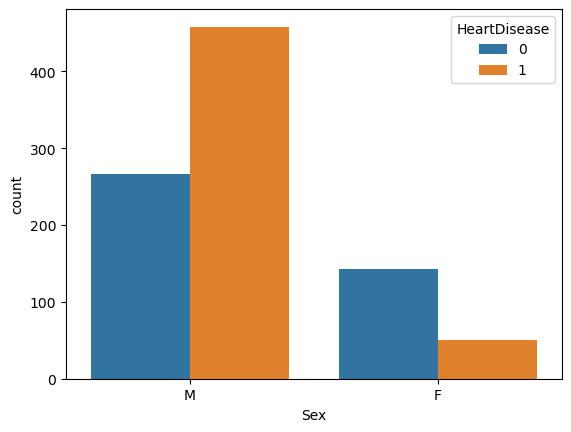

In [260]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

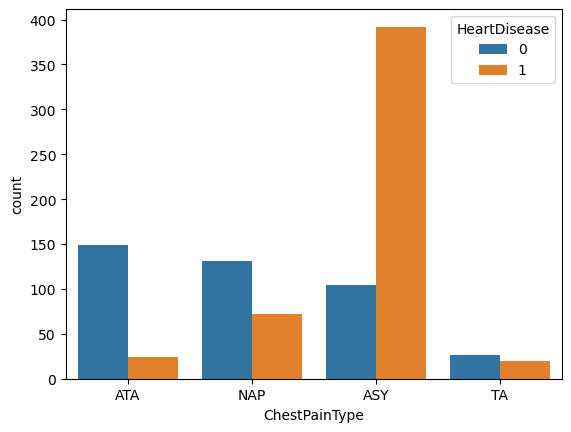

In [261]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

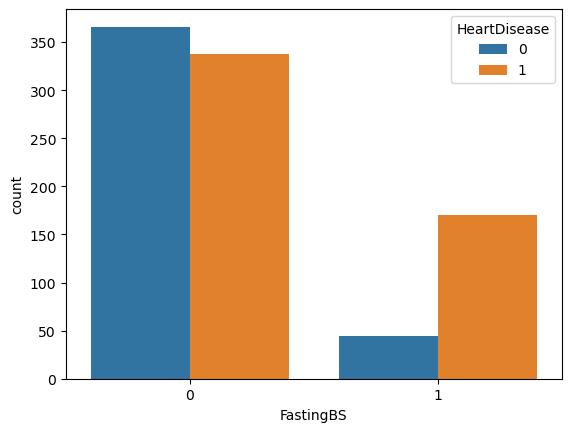

In [262]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

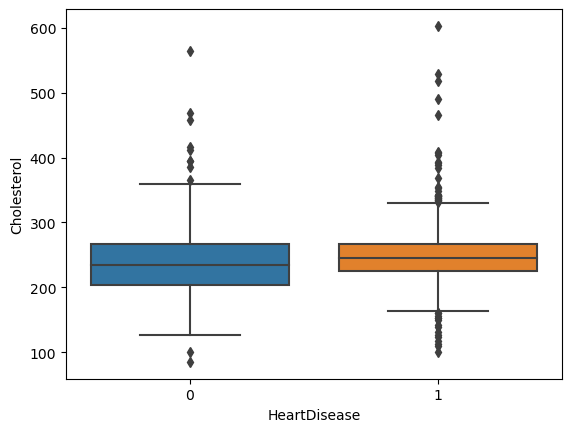

In [263]:
sns.boxplot(y='Cholesterol',x='HeartDisease',data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

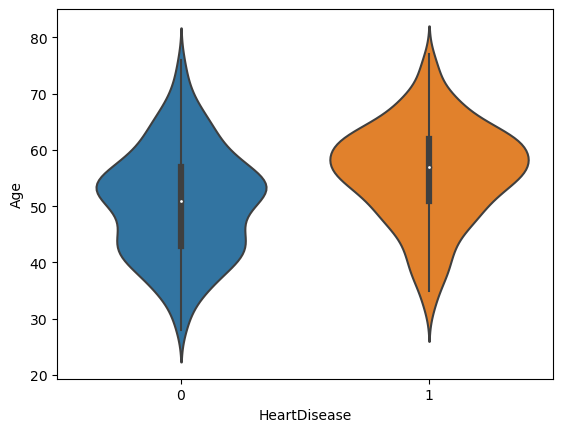

In [264]:
sns.violinplot(x='HeartDisease',y="Age",data=df)

<Axes: >

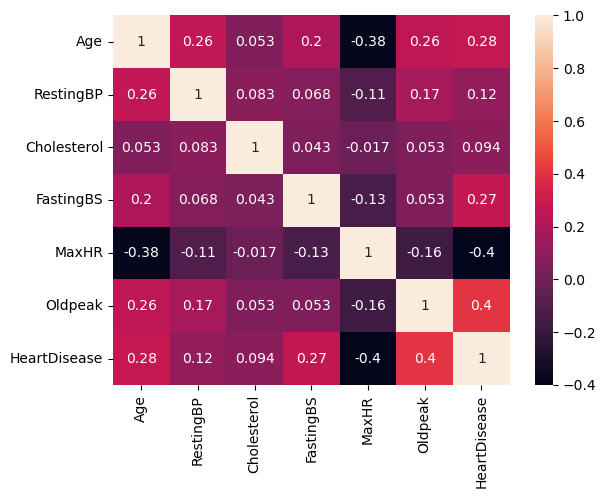

In [265]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Data Preprocessing and Cleaning**

In [266]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [267]:
df_encode = df_encode.astype(int)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


Standard Scaling

In [268]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

scalar =  StandardScaler()

df_encode[numerical_cols]  = scalar.fit_transform(df_encode[numerical_cols])

df_encode.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,-0.551341,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,-0.551341,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,-0.551341,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,-0.551341,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,-0.551341,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


**Feature Extraction and Engineering**

As we can extract feature here like for the cholesterol
Normal total cholesterol: 125–200 mg/dL <br>
High cholesterol: > 240 mg/dL<br>  
Very high: > 300 mg/dL<br>
600 mg/dL → critically high

In [269]:
# df_encode['Cholesterol_Category'] = pd.cut(
#     df_encode['Cholesterol'],
#     bins=[float(-np.inf), -2.24, -0.84, -0.09, 1.04, 6.67, float(np.inf)],
#     labels=['Very Low', 'Normal', 'Borderline', 'High', 'Very High', 'Extreme']
# )
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,-0.551341,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,-0.551341,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,-0.551341,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,-0.551341,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,-0.551341,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [270]:
# df_encode = pd.get_dummies(df_encode,columns=['Cholesterol_Category'],drop_first=True)
# df_encode

In [271]:
# # df_encode = df_encode.astype(int)
# convert_numeric = ['Cholesterol_Category_Normal',	'Cholesterol_Category_Borderline',	'Cholesterol_Category_High','Cholesterol_Category_Very High','Cholesterol_Category_Extreme']

# for col in convert_numeric:
#     df_encode[col] = df_encode[col].astype(int)

# df_encode.head()

In [272]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [273]:
from scipy.stats import pearsonr

#Fetures we are going to check against target
selected_features = [
   'Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_M','ChestPainType_ATA','ChestPainType_NAP',
   'ChestPainType_TA'
]

correlations = {
    feature: pearsonr(df_encode[feature], df_encode['HeartDisease'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
5,Oldpeak,0.392385
6,Sex_M,0.305445
0,Age,0.282039
3,FastingBS,0.267291
1,RestingBP,0.117909
2,Cholesterol,0.092586
9,ChestPainType_TA,-0.054790
8,ChestPainType_NAP,-0.212964
4,MaxHR,-0.400421
7,ChestPainType_ATA,-0.401924


In [274]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,-0.551341,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,-0.551341,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,-0.551341,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,-0.551341,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,-0.551341,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,-0.551341,-0.188999,0.282891,1,1,0,0,1,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1.813758,0.164684,2.303858,1,1,0,0,0,1,0,0,1,0
915,0.370100,-0.141284,-2.130180,-0.551341,-0.857069,0.282891,1,1,0,0,0,1,0,1,1,0
916,0.370100,-0.141284,-0.159813,-0.551341,1.461525,-0.727592,1,0,1,0,0,0,0,0,1,0


In [275]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [276]:
X = df_encode.drop('HeartDisease',axis=1)
y = df_encode['HeartDisease']

In [277]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [278]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [279]:
models = {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes':GaussianNB(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVM':SVC(kernel='rbf')
}

In [280]:
result=[]

In [281]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy':round(acc,4),
        'F1-Score':round(f1,4)
    })

In [282]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.8696, 'F1-Score': 0.8846},
 {'model': 'KNN', 'Accuracy': 0.8641, 'F1-Score': 0.8815},
 {'model': 'Naive Bayes', 'Accuracy': 0.8478, 'F1-Score': 0.8614},
 {'model': 'Decision Tree', 'Accuracy': 0.7717, 'F1-Score': 0.7879},
 {'model': 'SVM', 'Accuracy': 0.8478, 'F1-Score': 0.8667}]

In [283]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,-0.551341,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,-0.551341,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,-0.551341,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,-0.551341,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,-0.551341,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [284]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [285]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.to_list(),'columns.pkl')

['columns.pkl']

In [286]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,-0.551341,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,-0.551341,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,-0.551341,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,-0.551341,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,-0.551341,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
